# Learning Gate - Reto | Caso Líneas Aéreas

## Data Science Fundamentals - Regression


### Introduccion

Los adelantos de la navegación aérea y las telecomunicaciones, así como las facilidades electrónicas han permitido que la aviación haya progresado de forma asombrosa. Si bien es el tiempo el factor más relevante en el servicio de las aerolíneas, existen otros factores clave, y uno de ellos es el precio del boleto al destino deseado. El transporte aéreo o transporte por avión es el servicio de trasladar de un lugar a otro, pasajeros o cargamento
mediante la utilización de aeronaves con fines lucrativos

### Objective

El objetivo del NEGOCIO es lograr dar un mejor servicio a los clientes de las líneas áreas. Esto se logra al determinar las variables relevantes en el
servicio.

### Importing Libraries

In [1]:
import os, glob, math
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from sklearn import linear_model
import statsmodels.api as sm
from Functions.Functions import plottin_trend, Removing_IQROutliers, display_dfs, graficar, Coefficients_Table
geolocator = Nominatim(user_agent="text")

%matplotlib inline

### Loading Data

In [2]:
path = os.path.join(os.getcwd(), 'Data')
df = pd.read_csv(glob.glob(os.path.join(path, '*csv'))[0])
dfo = pd.read_excel(glob.glob(os.path.join(path, '*xlsx'))[0])

## Exploratory Data Analysis

### Analyzing Variables with Unknown Definitions

In [3]:
# Finding Locations using the provided latitude and longitude
Locations = []
for index, row in dfo.iterrows():
    location = geolocator.reverse(str(row['Latitude']) + ', ' +str(row['Longitude']))
    Locations.append(location.address.split(',')[-4].strip())

dfo['Location'] = Locations

### Descriptive Statistics Analysis

- ***Analyzing the Ticket Price Variable Behavior***

<Axes: ylabel='Ticket Price'>

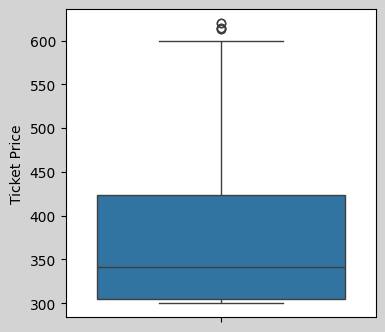

In [4]:
dfo_clean = dfo.copy()
fig, ax = plt.subplots(1,1, figsize=(4,4), facecolor='lightgray', sharey=True)
sns.boxplot(dfo['Ticket Price'], ax=ax)

# Outliers are not removed since they are helping the model to find the linear relationships
#cols = ['Ticket Price']
#dfo_clean = Removing_IQROutliers(dfo, cols)



- ***Exploring Relationships between the Ticket Price Variable and the Purchase Day Variable***

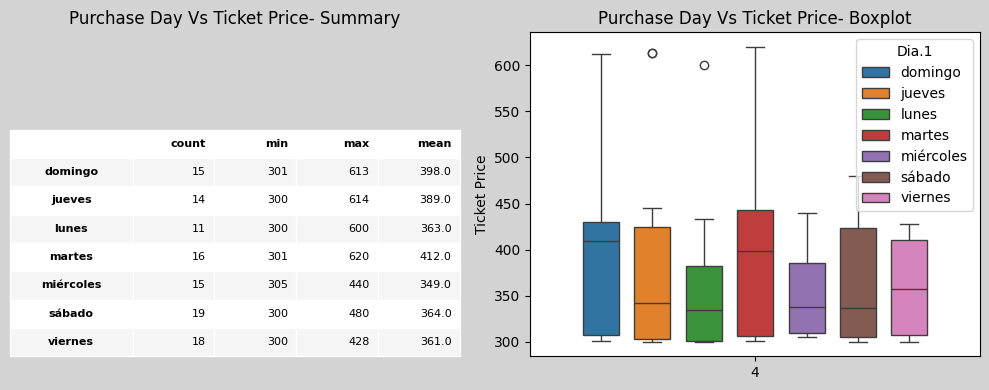

In [5]:
# Analyzing frequency of events per day to determime the presence of bias
plottin_trend(dfo_clean, 'Dia.1', 'Ticket Price', 'Purchase Day Vs Ticket Price')

- ***Exploring Relationships between the Ticket Price Variable and the Airline Day Variable***

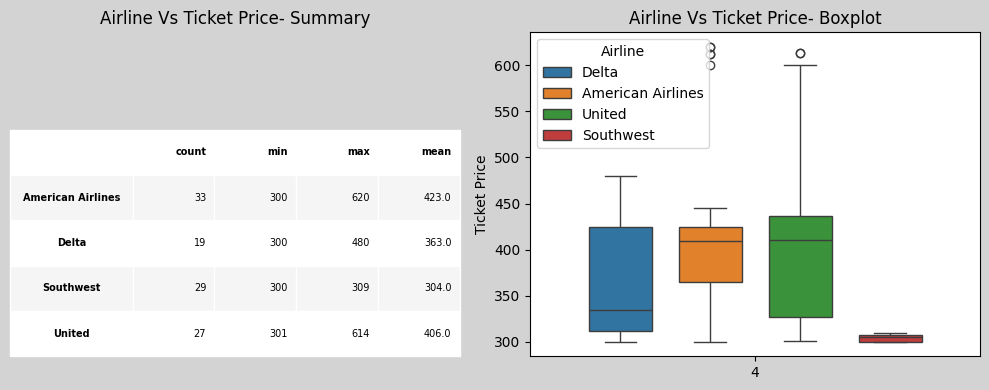

In [6]:
# Analyzing frequency of events per day to determime the presence of bias
plottin_trend(dfo_clean, 'Airline', 'Ticket Price', 'Airline Vs Ticket Price', 2.5, 2.5)

- ***Exploring Relationships between the Ticket Price Variable and the Route Point Variable***

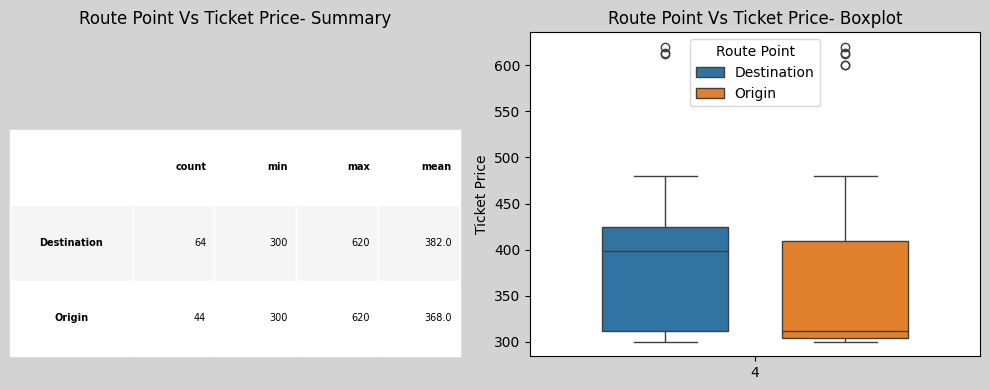

In [7]:
# Analyzing the effect of the route point variable
plottin_trend(dfo_clean, 'Route Point', 'Ticket Price', 'Route Point Vs Ticket Price')

- ***Exploring Relationships between the Ticket Price Variable and the Type of Traveler Variable***

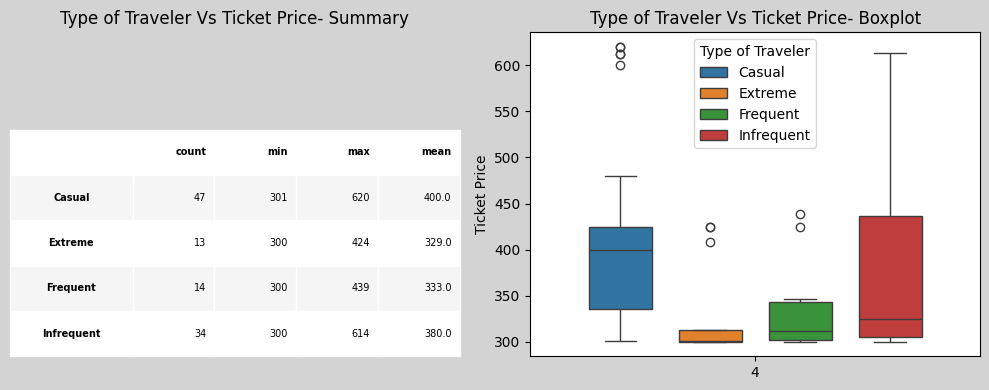

In [8]:
plottin_trend(dfo_clean, 'Type of Traveler', 'Ticket Price', 'Type of Traveler Vs Ticket Price')

- ***Exploring Relationships between the Ticket Price Variable and the Fare Type Variable***

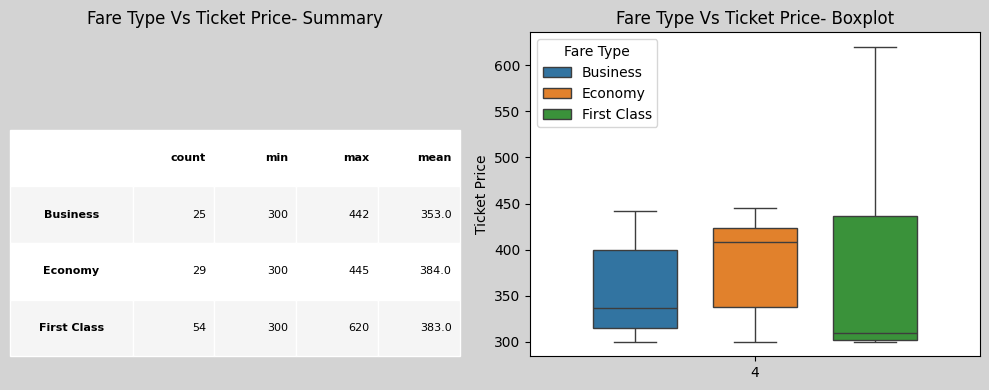

In [9]:
plottin_trend(dfo_clean, 'Fare Type', 'Ticket Price', 'Fare Type Vs Ticket Price')

- ***Exploring Relationships between the Ticket Price Variable and the Route (Flight Length) Variable***

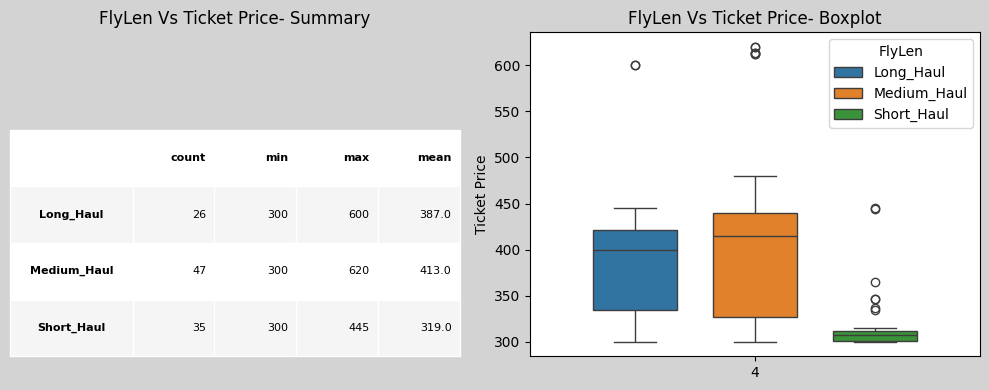

In [10]:
# Analyzing the effect on prices of the routes defined by the origins and desitinations
dict_FlyLen = {'DFW-SLC':165, 'DFW-SEA':255, 'DAL-HOU':80, 'DFW-GRB':258, 'DAL-ELP':105, 'DFW-JFK':230, 'DFW-ELP':105,
               'DFW-MEM':100, 'DFW-HIO':240, 'DAL-ATL':130,'DAL-PHX':155, 'DAL-MDW':140, 'DFW-MCO':160, 'DFW-IAD':180,
               'DFW-BUR':200, 'DFW-CMH':150, 'DFW-COS':125,'DAL-AUS':33,  'DFW-BUF':180, 'DAL-OKC':190} 

dfo_clean.loc[:, 'FlyLen'] = dfo_clean['Route'].map(dict_FlyLen)

idxs1 = dfo_clean[dfo_clean.FlyLen<151].index
idxs2 = dfo_clean[(dfo_clean.FlyLen>=151) & (dfo_clean.FlyLen<211)].index
idxs3 = dfo_clean[(dfo_clean.FlyLen>=211) & (dfo_clean.FlyLen<560)].index
dfo_clean.loc[idxs1, 'FlyLen'] = 'Short_Haul'
dfo_clean.loc[idxs2, 'FlyLen'] = 'Medium_Haul'
dfo_clean.loc[idxs3, 'FlyLen'] = 'Long_Haul'
dfo_clean.loc[:, ['Short_Haul', 'Medium_Haul', 'Long_Haul']] = pd.get_dummies(dfo_clean.FlyLen, dtype=int)[['Short_Haul', 'Medium_Haul', 'Long_Haul']].values

plottin_trend(dfo_clean, 'FlyLen', 'Ticket Price', 'FlyLen Vs Ticket Price', 2,2)

### Data Trends

#### Categorical Variables

- ***Analyzing Airlines and Type of Travelers related Variables***

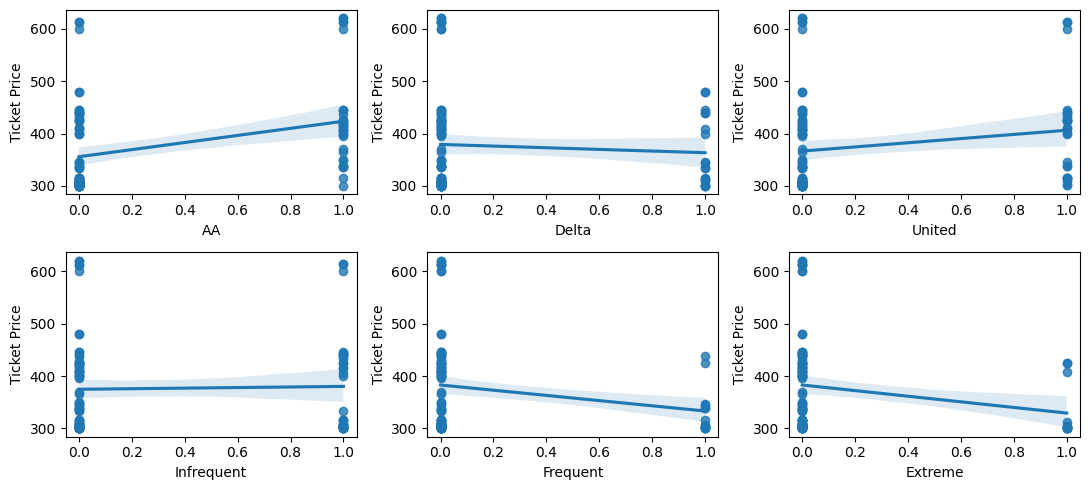

In [11]:
plt.figure(figsize=(11, 5))
ax1 = plt.subplot(2,3,1)
sns.regplot(data=dfo_clean, x='AA', y='Ticket Price', ax=ax1); 
ax2 = plt.subplot(2,3,2)
sns.regplot(data=dfo_clean, x='Delta', y='Ticket Price', ax=ax2)
ax3 = plt.subplot(2,3,3)
sns.regplot(data=dfo_clean, x='United', y='Ticket Price', ax=ax3); 
ax4 = plt.subplot(2,3,4)
sns.regplot(data=dfo_clean, x='Infrequent', y='Ticket Price', ax=ax4); 
plt.tight_layout()
ax5 = plt.subplot(2,3,5)
sns.regplot(data=dfo_clean, x='Frequent', y='Ticket Price', ax=ax5); 
plt.tight_layout()
ax6 = plt.subplot(2,3,6)
sns.regplot(data=dfo_clean, x='Extreme', y='Ticket Price', ax=ax6); 
plt.tight_layout()

- ***Analyzing Route (Flight Length) and Fare Type related Variables***

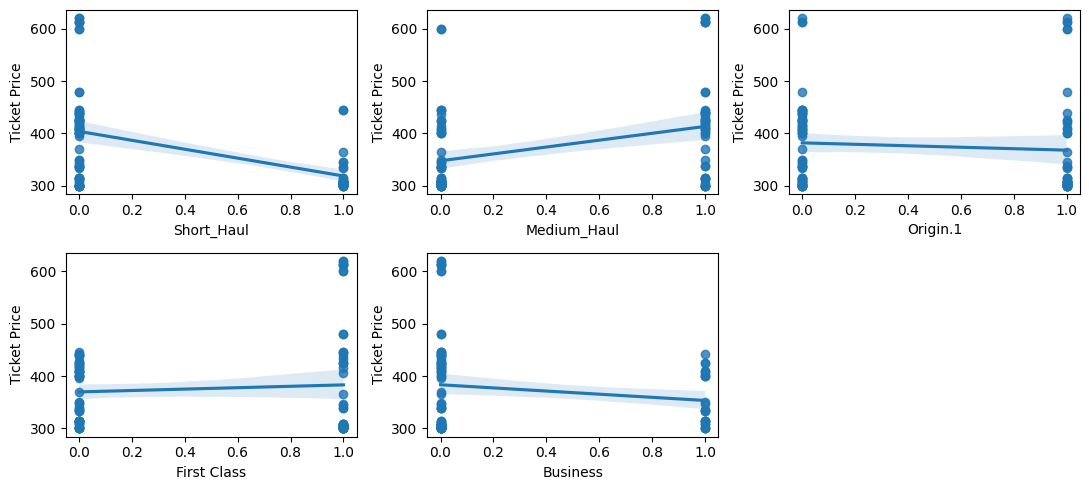

In [12]:
plt.figure(figsize=(11, 5))
ax1 = plt.subplot(2,3,1)
sns.regplot(data=dfo_clean, x='Short_Haul', y='Ticket Price', ax=ax1); 
ax2 = plt.subplot(2,3,2)
sns.regplot(data=dfo_clean, x='Medium_Haul', y='Ticket Price', ax=ax2)
ax3 = plt.subplot(2,3,3)
sns.regplot(data=dfo_clean, x='Origin.1', y='Ticket Price', ax=ax3); 
ax4 = plt.subplot(2,3,4)
sns.regplot(data=dfo_clean, x='First Class', y='Ticket Price', ax=ax4)
ax5 = plt.subplot(2,3,5)
sns.regplot(data=dfo_clean, x='Business', y='Ticket Price', ax=ax5); 
#ax6 = plt.subplot(4,3,6)
plt.tight_layout()

- ***Analyzing Travel Days related Variables***

<Axes: xlabel='Sábado', ylabel='Ticket Price'>

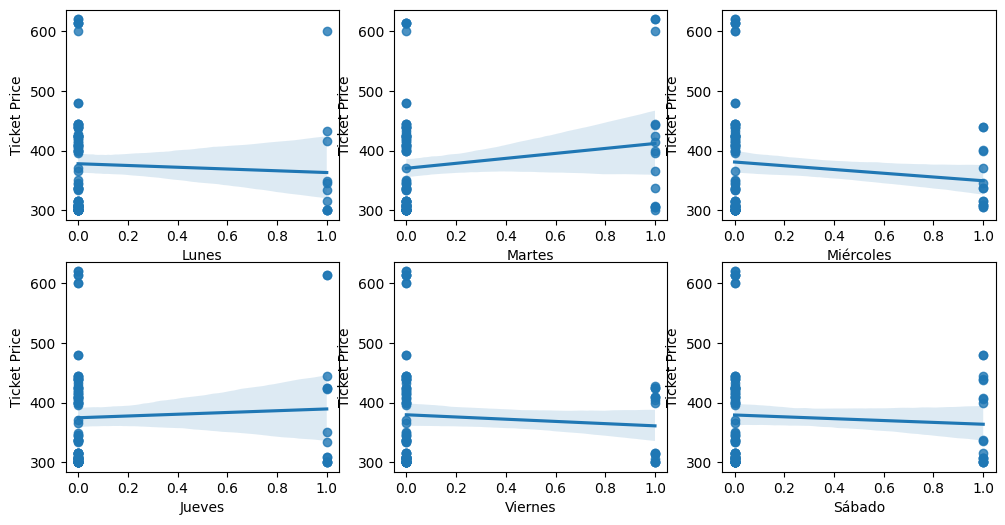

In [13]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
sns.regplot(data=dfo_clean, x='Lunes', y='Ticket Price', ax=ax1); 
ax2 = plt.subplot(2,3,2)
sns.regplot(data=dfo_clean, x='Martes', y='Ticket Price', ax=ax2)
ax3 = plt.subplot(2,3,3)
sns.regplot(data=dfo_clean, x='Miércoles', y='Ticket Price', ax=ax3); 
ax4 = plt.subplot(2,3,4)
sns.regplot(data=dfo_clean, x='Jueves', y='Ticket Price', ax=ax4)
ax5 = plt.subplot(2,3,5)
sns.regplot(data=dfo_clean, x='Viernes', y='Ticket Price', ax=ax5); 
ax6 = plt.subplot(2,3,6)
sns.regplot(data=dfo_clean, x='Sábado', y='Ticket Price', ax=ax6)

#### NMumerical Variables

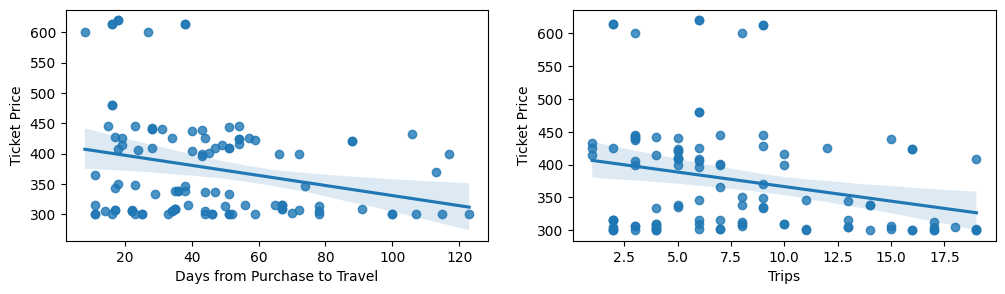

In [14]:
plt.figure(figsize=(12, 3))
ax1 = plt.subplot(1,2,1)
sns.regplot(data=dfo_clean, x='Days from Purchase to Travel', y='Ticket Price', ax=ax1); 
ax2 = plt.subplot(1,2,2)
sns.regplot(data=dfo_clean, x='Trips', y='Ticket Price', ax=ax2);

## Training Model (Regressors) to Predict Ticket Prices

### Regressor relying on all provide features (Basic Case)

- ***Correlation Matrix for the selected features***

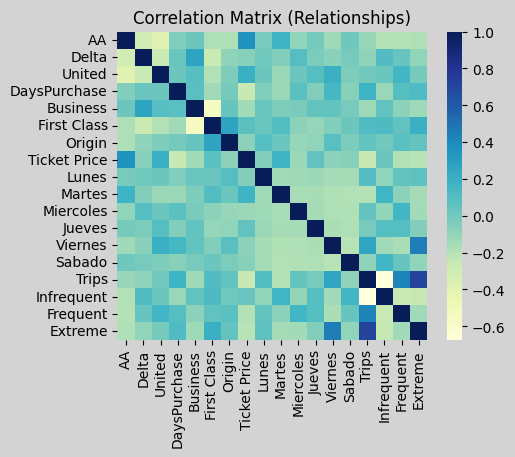

In [15]:
df_model = df.copy()
corr = df_model.corr()
fig, ax = plt.subplots(1,1, figsize=(5,4), facecolor='lightgray', sharey=True)
sns.heatmap(corr, ax=ax, cmap="YlGnBu", annot=False)
ax.set_title('Correlation Matrix (Relationships)');

- ***Creating the regressor (Training the Model)***

In [16]:
target = 'Ticket Price'
cols = corr.columns.tolist()
cols.remove(target)
X = sm.add_constant(df_model[cols])
Y = df_model[target].values
reg_s= sm.OLS(Y,X).fit()
Y_model1 = reg_sm.predict(X)

- ***Summarizing the Performance of the Trained Model***

In [17]:
Coefficients_Table(df_model, reg_sm, 'Ticket Price', Y, Y_model1)

Equation Found: y =  239.7242 + 
                     167.7747 AA
                     143.8138 Delta
                     176.7536 United
                     -0.4044 DaysPurchase
                     -33.6871 Business
                     84.348 First Class
                     14.1977 Origin
                     -26.6521 Lunes
                     0.0891 Martes
                     -22.2478 Miercoles
                     9.5552 Jueves
                     -20.8442 Viernes
                     -19.0584 Sabado
                     2.8489 Trips
                     0.6032 Infrequent
                     -79.9249 Frequent
                     -54.3744 Extreme



,DoF,F-Value,P-value(F),R-Squared,Adj. R-squared,MAE,MSE
Scores,17,9.386843,1.563131e-13,63.938888,57.127345,41.105465,2670.729945


,Coef,SE Coef,Corr. Coef,T-value,P-value(T),VIF
const,239.724226,40.593357,NaN,5.905504,6.147089e-08,NaN
AA,167.774696,18.866045,0.362682,8.892945,5.749708e-14,2.724465
Delta,143.813828,21.160858,-0.070089,6.796219,1.133000e-09,2.063963
United,176.753591,19.088228,0.200270,9.259822,9.905651e-15,2.276292
DaysPurchase,-0.404415,0.214466,-0.258415,-1.885684,6.256305e-02,3.909147
Business,-33.687126,16.340401,-0.147254,-2.061585,4.213153e-02,2.071047
First Class,84.348041,16.735034,0.078112,5.040207,2.387354e-06,3.841915
Origin,14.197671,12.419772,-0.079771,1.143151,2.560077e-01,2.046764
Lunes,-26.652075,23.220720,-0.051963,-1.147771,2.541048e-01,1.795586
Martes,0.089123,21.302987,0.171748,0.004184,9.966712e-01,2.199649


- ***Analyzing the Behavior of the Model Residuals***

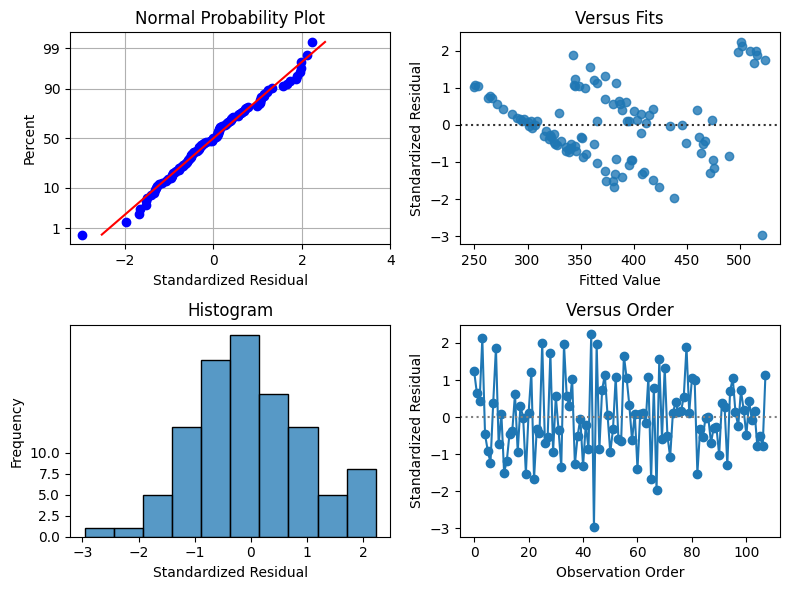

In [18]:
standarized_residuals = reg_sm.get_influence().resid_studentized_internal
standarized_residuals
graficar(X,Y, standarized_residuals, reg_sm, (8,6))

### Regressor - Selecting Features based on their Behaviours (Advanced Case)

- ***Selecting Features for the Regressor to be Created***

In [19]:
#dfo_clean.loc[:, 'Medium_Haul'] = dfo_clean['Long_Haul']+dfo_clean['Medium_Haul'] 
dfo_clean.loc[:,'Frequent'] = dfo_clean['Frequent']+dfo_clean['Extreme'] 

cols2remove = ['Airline', 'Airport Name', 'Airport Code-1', 'Location', 'Airport Name', 'Passenger Email', 'Latitude', 'Longitude', 'Fare Type',
               'Type of Traveler', 'Número de registros', 'Person-1', 'Person', 'Purchase Date', 'Row ID', 'Route Point', 'FlyLen', 'Long_Haul',
               'Airport Code', 'Destination', 'Route', 'Travel Date', 'Dia', 'Dia.1', 'Infrequent', 'Extreme', 'Origin']

dfo_clean = dfo_clean.drop(cols2remove, axis=1)
dfo_clean = dfo_clean.rename(columns={'Days from Purchase to Travel':'DaysPurchase', 'Origin.1':'Origin'})
display(dfo_clean)

,AA,Delta,United,DaysPurchase,Business,First Class,Origin,Ticket Price,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Trips,Frequent,Short_Haul,Medium_Haul
0,0,1,0,47,1,0,0,409,0,0,0,0,0,0,5,0,0,0
1,1,0,0,88,0,0,0,420,0,0,0,0,0,0,5,0,0,1
2,0,0,1,31,0,0,0,440,0,0,0,0,0,0,5,0,0,1
3,1,0,0,38,0,1,0,613,0,0,0,0,0,0,9,0,0,1
4,0,0,0,46,0,1,0,301,0,0,0,0,0,0,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,44,0,1,1,305,0,0,0,0,1,0,18,1,0,1
104,0,0,1,54,0,1,1,424,0,0,0,0,1,0,16,1,0,0
105,0,0,1,67,1,0,0,315,0,0,0,0,1,0,2,0,1,0
106,0,0,1,67,1,0,1,315,0,0,0,0,1,0,2,0,1,0


- ***Correlation Matrix for the selected features***

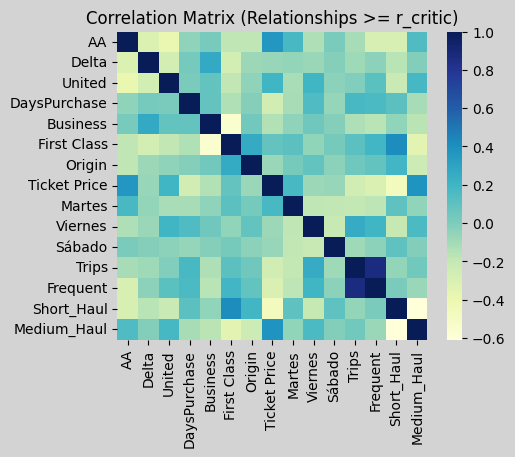

In [20]:
r_critic = .195
cols2use = dfo_clean.columns[dfo_clean.corr()[np.absolute(dfo_clean.corr())>=r_critic].sum()!=1]
idxs = dfo_clean[cols2use].corr().index[dfo_clean[cols2use].corr()[np.absolute(dfo_clean[cols2use].corr())>r_critic].sum(axis=0)!=1]
corr = dfo_clean[cols2use].corr()
corr = corr.loc[idxs]
fig, ax = plt.subplots(1,1, figsize=(5,4), facecolor='lightgray', sharey=True)
sns.heatmap(dfo_clean[cols2use].corr(), ax=ax, cmap="YlGnBu", annot=False)
ax.set_title('Correlation Matrix (Relationships >= r_critic)');

- ***Correlations among all the selected features***

In [21]:
dfs = {}
for col in cols2use:
    dfs[col] = pd.DataFrame(corr[col], columns=[col]) #dfo_clean[cols2use].corr()[[col]]
display_dfs(dfs, justify='flex-start')

,AA
AA,1.000000
Delta,-0.306484
United,-0.382971
DaysPurchase,-0.048224
Business,0.017209
First Class,-0.180907
Origin,-0.181818
Ticket Price,0.362682
Martes,0.176034
Viernes,-0.134840


- ***Creating the regressor (Training the Model)***

In [22]:
df_model = dfo_clean[corr.columns].copy()
target = 'Ticket Price'
cols = df_model.columns.tolist()
cols.remove(target)
X = sm.add_constant(dfo_clean[cols])
Y = df[target].values
reg_sm = sm.OLS(Y,X).fit()
Y_model2_basic = reg_sm.predict(X)

- ***Summarizing the Performance of the Trained Model***

In [23]:
Coefficients_Table(df_model, reg_sm, 'Ticket Price', Y, Y_model2_basic)

Equation Found: y =  207.122 + 
                     145.7636 AA
                     119.0146 Delta
                     147.0896 United
                     -0.1905 DaysPurchase
                     6.9071 Business
                     118.1196 First Class
                     13.2552 Origin
                     9.041 Martes
                     -19.9723 Viernes
                     -12.377 Sábado
                     0.8923 Trips
                     -50.9832 Frequent
                     -17.071 Short_Haul
                     57.5966 Medium_Haul



,DoF,F-Value,P-value(F),R-Squared,Adj. R-squared,MAE,MSE
Scores,14,15.677179,9.188305e-19,70.238144,65.757865,36.19345,2204.199392


,Coef,SE Coef,Corr. Coef,T-value,P-value(T),VIF
const,207.122019,31.709274,NaN,6.531907,3.410752e-09,NaN
AA,145.763611,20.371796,0.362682,7.155167,1.890229e-10,3.117720
Delta,119.014558,22.342957,-0.070089,5.326715,6.932262e-07,2.043023
United,147.089635,19.633959,0.200270,7.491593,3.854380e-11,2.239999
DaysPurchase,-0.190462,0.196131,-0.258415,-0.971093,3.340211e-01,4.110502
Business,6.907082,16.389681,-0.147254,0.421429,6.744145e-01,2.464997
First Class,118.119595,16.055529,0.078112,7.356942,7.298490e-11,3.598162
Origin,13.255228,10.902999,-0.079771,1.215741,2.271605e-01,1.946426
Martes,9.040963,15.122981,0.171748,0.597829,5.514068e-01,1.426411
Viernes,-19.972254,14.996131,-0.080451,-1.331827,1.861719e-01,1.577982


- ***Analyzing the Behavior of the Model Residuals***

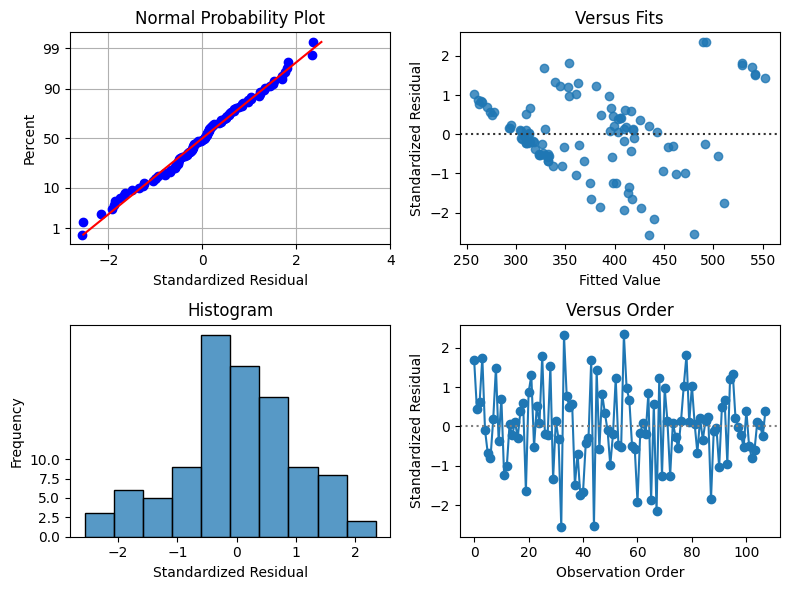

In [24]:
standarized_residuals = reg_sm.get_influence().resid_studentized_internal
standarized_residuals
graficar(X,Y, standarized_residuals, reg_sm, (8,6))

#### ***Using Hypothesis Test to Improve the Performance of the Trained Model - Increasing the Model Congruence***

- ***Hypothesis Tests***

In [25]:
alpha = 0.05
while (reg_sm.pvalues[reg_sm.pvalues.argmax()]>= alpha) | (reg_sm.pvalues.argmax()==0):
    print('Variable to be Discarted: ', reg_sm.pvalues.index[reg_sm.pvalues.argmax()],
         '; P-value: ', reg_sm.pvalues[reg_sm.pvalues.argmax()])
    df_model.drop(reg_sm.pvalues.index[reg_sm.pvalues.argmax()], axis=1, inplace=True)

    cols = df_model.columns.tolist()
    cols.remove(target)
    X = sm.add_constant(dfo_clean[cols])
    Y = df[target].values
    reg_sm = sm.OLS(Y,X).fit()
    Y_model2_adv = reg_sm.predict(X)

Variable to be Discarted:  Trips ; P-value:  0.6857949930499077
Variable to be Discarted:  Business ; P-value:  0.6486551714924456
Variable to be Discarted:  Martes ; P-value:  0.5746965784211319
Variable to be Discarted:  Short_Haul ; P-value:  0.3868305281366856
Variable to be Discarted:  DaysPurchase ; P-value:  0.23874617825245342
Variable to be Discarted:  Sábado ; P-value:  0.25167607386416085
Variable to be Discarted:  Viernes ; P-value:  0.2520162762071103
Variable to be Discarted:  Origin ; P-value:  0.1610139530483323


- ***Summarizing the Performance of the Trained Model***

In [26]:
Coefficients_Table(df_model, reg_sm, 'Ticket Price', Y, Y_model2_adv)

Equation Found: y =  190.5627 + 
                     158.2307 AA
                     131.0599 Delta
                     154.1663 United
                     121.225 First Class
                     -45.2514 Frequent
                     61.0346 Medium_Haul



,DoF,F-Value,P-value(F),R-Squared,Adj. R-squared,MAE,MSE
Scores,6,35.582848,7.781329e-23,67.885235,65.977427,37.205497,2378.458685


,Coef,SE Coef,Corr. Coef,T-value,P-value(T),VIF
const,190.562694,16.631778,NaN,11.457746,5.676258e-20,NaN
AA,158.230653,15.604740,0.362682,10.139910,4.413146e-17,1.506414
Delta,131.059878,17.852526,-0.070089,7.341251,5.519001e-11,1.169574
United,154.166345,15.994861,0.200270,9.638493,5.616972e-16,1.504011
First Class,121.225009,12.687636,0.078112,9.554578,8.596935e-16,1.423085
Frequent,-45.251350,11.904182,-0.302641,-3.801299,2.463998e-04,1.423307
Medium_Haul,61.034563,10.696773,0.378387,5.705886,1.161512e-07,1.944968


- ***Analyzing the Behavior of the Model Residuals***

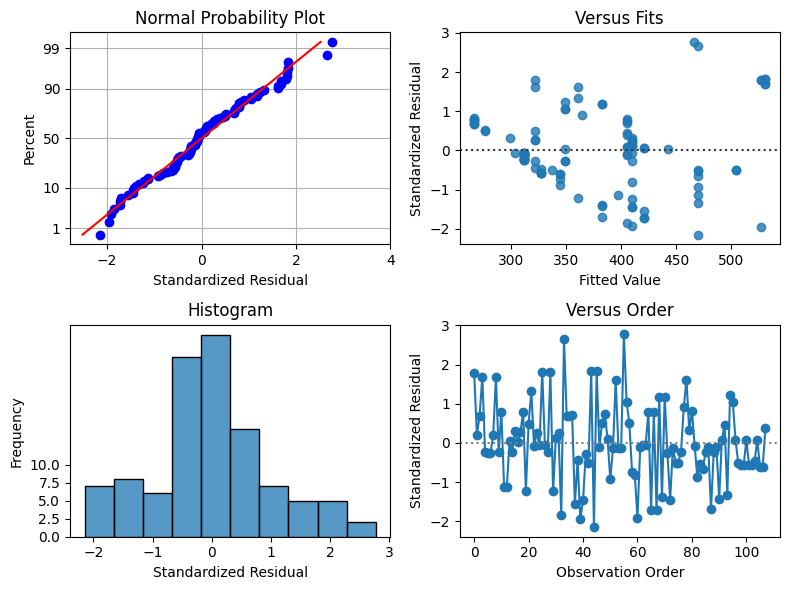

In [27]:
standarized_residuals = reg_sm.get_influence().resid_studentized_internal
standarized_residuals
graficar(X,Y, standarized_residuals, reg_sm, (8,6))

## Conclusions

### Equation to Model the Ticket Prices

*y* = $\beta_{0}$ + $\beta_{1}$ $x_{1}$ + $\beta_{2}$ $x_{2}$ + ... $\beta_{n}$ $x_{n}$ + $\epsilon$ :

In [28]:
print('y = ', str(round(reg_sm.params[0], 4)) + ' +  ' + '                 '.join([str(round(coef,4)) + ' ' + str(var) + '\n' for var, coef in zip(reg_sm.params[1:].index.tolist(), reg_sm.params[1:])]))

y =  190.5627 +  158.2307 AA
                 131.0599 Delta
                 154.1663 United
                 121.225 First Class
                 -45.2514 Frequent
                 61.0346 Medium_Haul



### Most Significant Variables that Describe the Price of Plane Tickets

In [29]:
print('Most Significant Variables: \n', '\n '.join([var for var in reg_sm.params.index.tolist()[1:]]))

Most Significant Variables: 
 AA
 Delta
 United
 First Class
 Frequent
 Medium_Haul


### Comparing the Performance of the Trained Models

Text(0, 0.5, 'Ticket Price')

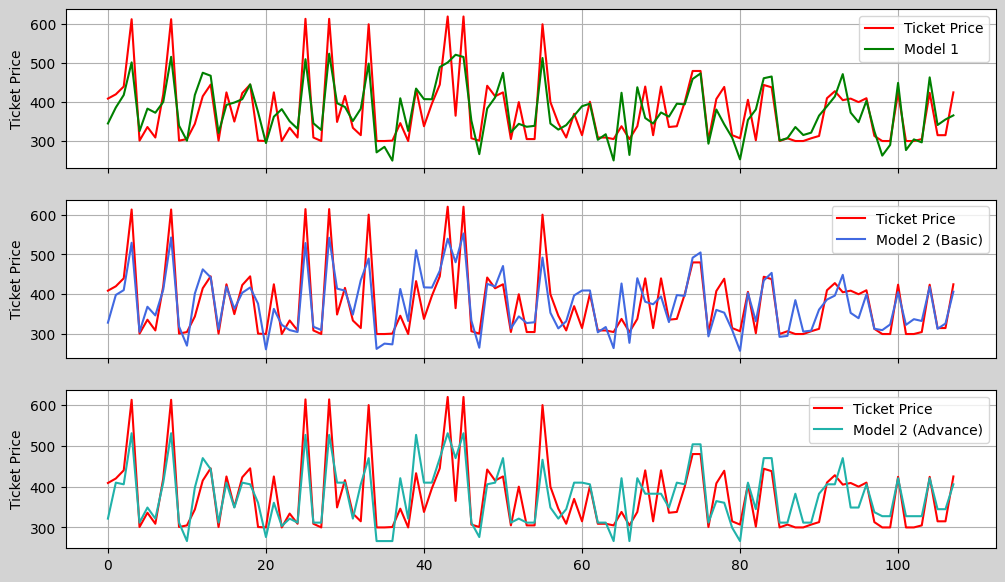

In [30]:
fig, ax = plt.subplots(3,1, figsize=(12,7), facecolor='lightgray', sharex=True)
ax1 = plt.subplot(3,1,1)
ax1.plot(dfo_clean['Ticket Price'].values, label= 'Ticket Price', linestyle='-', color='red', marker='')
ax1.plot(Y_model1, label='Model 1', linestyle='-', marker='', color='green')
ax1.legend()
ax1.grid()
ax1.set_ylabel('Ticket Price')

ax2 = plt.subplot(3,1,2)
ax2.plot(dfo_clean['Ticket Price'].values, label= 'Ticket Price', linestyle='-', color='red', marker='')
ax2.plot(Y_model2_basic, label='Model 2 (Basic)', linestyle='-', marker='', color='royalblue')
ax2.legend()
ax2.grid()
ax2.set_ylabel('Ticket Price')

ax3 = plt.subplot(3,1,3)
ax3.plot(dfo_clean['Ticket Price'].values, label= 'Ticket Price', linestyle='-', color='red', marker='')
ax3.plot(Y_model2_adv, label='Model 2 (Advance)', linestyle='-', color='lightseagreen', marker='')
ax3.legend()
ax3.grid()
ax3.set_ylabel('Ticket Price')

### Conclusion

# FIN